#Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, GRU, LSTM, Bidirectional
from keras.layers import Flatten, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing import sequence



#Importing Dataset:

In [ ]:
file=pd.read_csv("googleplaystore.csv")
file.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


#Columns:

In [ ]:
file.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
file.shape

(10841, 13)

#Checking Nan Values And Handling Them:

In [ ]:
file.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
mean_of_rating = file['Rating'].mean()
mode_of_type = file['Type'].mode().iloc[0]
mode_of_content_rating = file['Content Rating'].mode().iloc[0]
mode_of_android_version = file['Android Ver'].mode().iloc[0]
file['Rating'].fillna(mean_of_rating, inplace=True)
file['Type'].fillna(mode_of_type, inplace=True)
file['Content Rating'].fillna(mode_of_content_rating, inplace=True)
file['Android Ver'].fillna(mode_of_android_version, inplace=True)

In [ ]:
file.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       0
dtype: int64

In [ ]:
file.shape

(10841, 13)

In [ ]:
file.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#Exploring the distribution of variables:

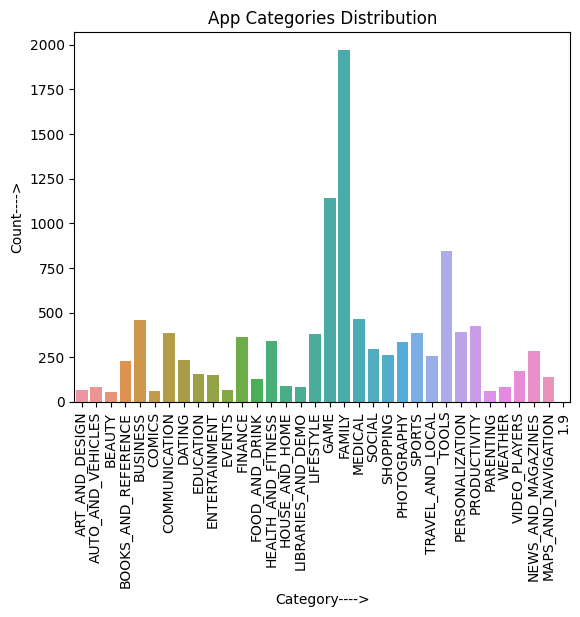

In [ ]:
sns.countplot(x='Category', data=file)
plt.xticks(rotation=90)
plt.title('App Categories Distribution')
plt.xlabel('Category---->')
plt.ylabel('Count---->')
plt.show()

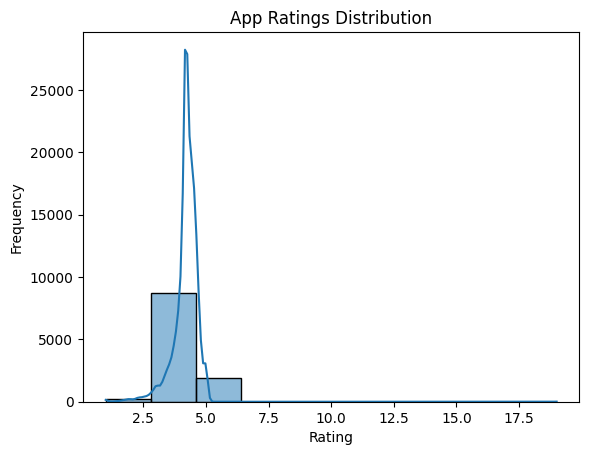

In [ ]:
sns.histplot(file.Rating, bins=10, kde=True)
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

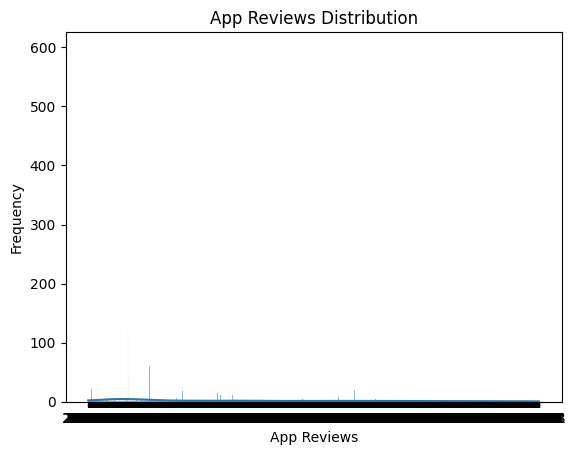

In [ ]:
sns.histplot(file.Reviews, bins=50, kde=True)
plt.title('App Reviews Distribution')
plt.xlabel('App Reviews')
plt.ylabel('Frequency')
plt.show()

In [ ]:
for i in file.columns:
  print(file[i].describe())

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object
count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object
count    10841.000000
mean         4.193338
std          0.499557
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max         19.000000
Name: Rating, dtype: float64
count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object
count                  10841
unique                   462
top       Varies with device
freq                    1695
Name: Size, dtype: object
count          10841
unique            22
top       1,000,000+
freq            1579
Name: Installs, dtype: object
count     10841
unique        3
top        Free
freq      10040
Name: Type, dtype: object
count     10841
unique       93
top           0
freq      10040
Name: Price, dtype: object
count        10841
unique           6
top       Everyone
freq          871

        Rating
Rating     1.0


<ipython-input-14-3765f7064c9a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = file[['Installs', 'Rating']].corr()


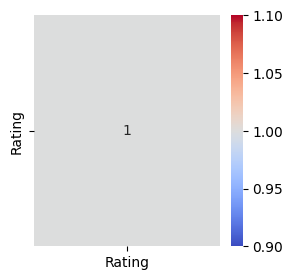

In [ ]:
corr = file[['Installs', 'Rating']].corr()
print(corr)
plt.figure(figsize=(3, 3))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

         Size  Reviews
Size      NaN      NaN
Reviews   NaN      1.0


<Axes: >

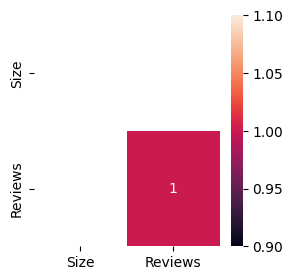

In [ ]:
file['Size'] = pd.to_numeric(file['Size'], errors='coerce')
file['Reviews'] = pd.to_numeric(file['Reviews'], errors='coerce')
c=file[['Size',"Reviews"]].corr()
print(c)
plt.figure(figsize=(3, 3))
sns.heatmap(c,annot=True)

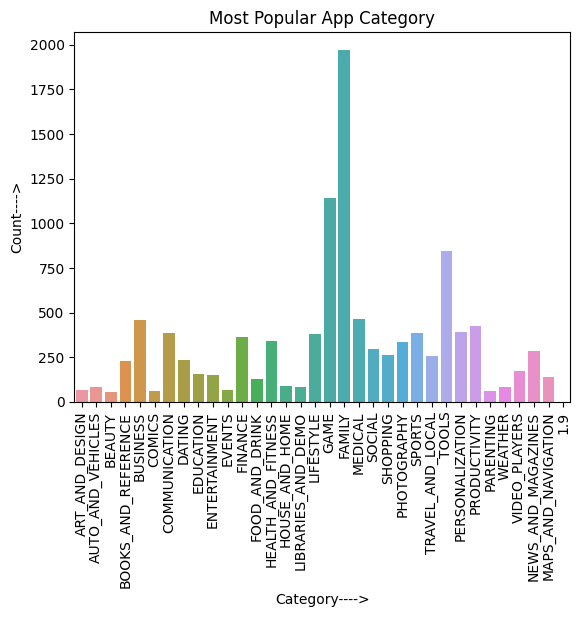

In [ ]:
sns.countplot(x='Category', data=file)
plt.xticks(rotation=90)
plt.title('Most Popular App Category')
plt.xlabel('Category---->')
plt.ylabel('Count---->')
plt.show()

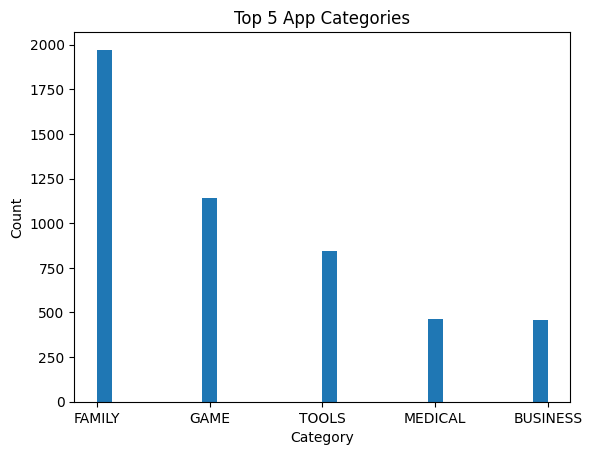

In [ ]:
category_data = file['Category'].value_counts().head(5)
plt.hist(category_data.index, weights=category_data.values, bins=30)
plt.title('Top 5 App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
columns_to_include = [i for i in file.columns if i != 'Size']
file[columns_to_include].describe()


,Rating,Reviews
count,10841.000000,1.084000e+04
mean,4.193338,4.441529e+05
std,0.499557,2.927761e+06
min,1.000000,0.000000e+00
25%,4.100000,3.800000e+01
50%,4.200000,2.094000e+03
75%,4.500000,5.477550e+04
max,19.000000,7.815831e+07


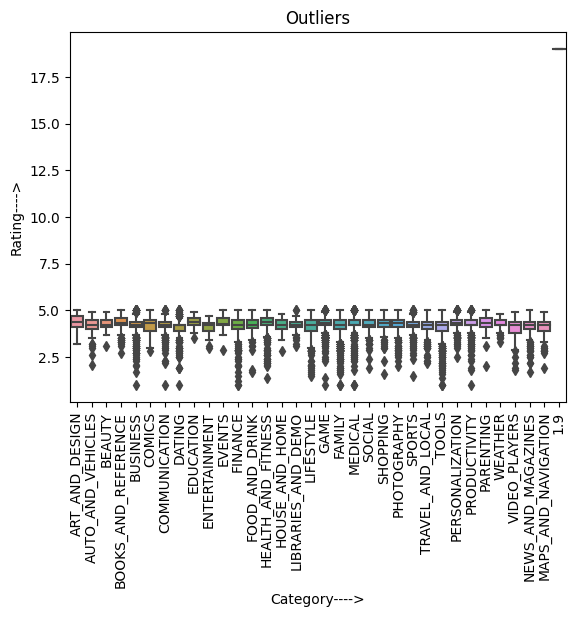

In [ ]:
sns.boxplot(x='Category', y="Rating",data=file)
plt.xticks(rotation=90)
plt.title('Outliers')
plt.xlabel('Category---->')
plt.ylabel('Rating---->')
plt.show()

In [ ]:
file=file.drop_duplicates()
file.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,NaN,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,NaN,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,NaN,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,NaN,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,NaN,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
file.shape

(10358, 13)

In [ ]:
def remove_outliers(data, threshold=3):
    z_score = stats.zscore(data)
    outlier_indices = np.abs(z_score) > threshold
    cleaned_data = data[~outlier_indices]
    return cleaned_data

In [ ]:
remove_outliers(file.select_dtypes(include=['int','float']))


,Rating,Reviews,Size
0,4.100000,159.0,NaN
1,3.900000,967.0,NaN
2,4.700000,87510.0,NaN
3,4.500000,215644.0,NaN
4,4.300000,967.0,NaN
...,...,...,...
10836,4.500000,38.0,NaN
10837,5.000000,4.0,NaN
10838,4.193338,3.0,NaN
10839,4.500000,114.0,NaN


In [ ]:
def count_outliers(data, threshold):
    z_scores = stats.zscore(data)
    outliers_count = np.sum(np.abs(z_scores) > threshold)
    return outliers_count

In [ ]:
count_outliers(file.select_dtypes(include=['int','float']),threshold=30)
#threshold should greater otherwise  we will have outliers in Rating column.

Rating     0
Reviews    0
Size       0
dtype: int64

In [ ]:
file.groupby('Category')['Rating'].mean()

Category
1.9                    19.000000
ART_AND_DESIGN          4.350462
AUTO_AND_VEHICLES       4.190824
BEAUTY                  4.260882
BOOKS_AND_REFERENCE     4.311943
BUSINESS                4.135958
COMICS                  4.156445
COMMUNICATION           4.158216
DATING                  4.013538
EDUCATION               4.374564
ENTERTAINMENT           4.136036
EVENTS                  4.363647
FAMILY                  4.191406
FINANCE                 4.135315
FOOD_AND_DRINK          4.168388
GAME                    4.277598
HEALTH_AND_FITNESS      4.251656
HOUSE_AND_HOME          4.169001
LIBRARIES_AND_DEMO      4.181962
LIFESTYLE               4.113799
MAPS_AND_NAVIGATION     4.065061
MEDICAL                 4.185279
NEWS_AND_MAGAZINES      4.140784
PARENTING               4.282223
PERSONALIZATION         4.305620
PHOTOGRAPHY             4.183479
PRODUCTIVITY            4.200279
SHOPPING                4.245774
SOCIAL                  4.247001
SPORTS                  4.219279
T

#TASK#2:

In [ ]:
df = pd.read_csv('urdu-sentiment-corpus-v1.tsv', delimiter='\t')
Tweets = df['Tweet'].tolist()
Classes  = df['Class'].tolist()
numFreqwords = 5000
maxSeqwords  =  500
tokenizer = Tokenizer(num_words=numFreqwords)
tokenizer.fit_on_texts(Tweets)
sequences = tokenizer.texts_to_sequences(Tweets)
x = pad_sequences(sequences, maxlen=maxSeqwords)
y = np.array(Classes)
np.random.seed(42)
indices = np.random.permutation(len(x))
x = x[indices]
y = y[indices]
y[y=='N']=0
y[y=='P']=1
y[y=='O']=0
y[y=='nan']=0
y= y.astype(int)
trainSize = int(0.75 * len(x))
x_train, x_test = x[:trainSize], x[trainSize:]
y_train, y_test = y[:trainSize], y[trainSize:]
diffLayers = [2, 3]
dropoutRates = [0.3, 0.7]
modelType = ['RNN', 'GRU', 'LSTM', 'BiLSTM']

def createModel(numOFlayers, dropoutRate, mod):
    model = Sequential()
    model.add(Embedding(5000, 32, input_length=maxSeqwords))
    for i in range(numOFlayers):
        if mod == 'RNN':      # Recurrent Neural Network
            model.add(SimpleRNN(32, return_sequences=True))
        elif mod == 'GRU':    # Gated Recurrent Unit
            model.add(GRU(32, return_sequences=True))
        elif mod == 'LSTM':   # Long short-term memory
            model.add(LSTM(32, return_sequences=True))
        elif mod == 'BiLSTM': # Bidirectional Long Short-Term Memory
            model.add(Bidirectional(LSTM(32, return_sequences=True)))

        model.add(Dropout(dropoutRate))

    model.add(Flatten())                        #Adding flatten layer
    model.add(Dense(1, activation='sigmoid'))   #Adding output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


results = []
for layers in diffLayers:
    for rate in dropoutRates:
        for models in modelType:

            # Creating and compiling the model by calling the function above called createModel
            model = createModel(layers, rate, models)

            # Training the model
            #Keeping the epochs set to 3
            model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

            # Making predictions:
            y_pred_probs = model.predict(x_test)
            y_pred = np.round(y_pred_probs).flatten().astype(int)

            # Calculating evaluation metrics according to ones instructed in question:
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Saving the results by appending dictionary type results for each iteration
            results.append({
                      'Layers': layers,
                      'Dropout Rate': rate,
                      'Model Type': models,
                      'Accuracy': accuracy,
                      'Precision': precision,
                      'Recall': recall,
                      'F1-score': f1
                           })



# Printing the results in table form as instructed in question
print("\nResults after testing different parameters are as follows:")
print("Layers\tDropout Rate\tModel Type\tAccuracy\tPrecision\tRecall\t\tF1-score")
for result in results:
    print(f"{result['Layers']}\t{result['Dropout Rate']}\t\t{result['Model Type']}\t\t{result['Accuracy']:.4f}\t\t{result['Precision']:.4f}\t\t{result['Recall']:.4f}\t\t{result['F1-score']:.4f}")


Epoch 1/3
12/12 [==============================] - 13s 715ms/step - loss: 0.7341 - accuracy: 0.5000 - val_loss: 0.7500 - val_accuracy: 0.4240
Epoch 2/3
12/12 [==============================] - 6s 492ms/step - loss: 0.7018 - accuracy: 0.5227 - val_loss: 0.7003 - val_accuracy: 0.5760
Epoch 3/3
8/8 [==============================] - 1s 74ms/step
Epoch 1/3
12/12 [==============================] - 16s 881ms/step - loss: 0.6950 - accuracy: 0.4800 - val_loss: 0.6939 - val_accuracy: 0.4120
Epoch 2/3
12/12 [==============================] - 11s 857ms/step - loss: 0.6929 - accuracy: 0.5120 - val_loss: 0.6936 - val_accuracy: 0.4800
Epoch 3/3
8/8 [==============================] - 2s 126ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/3
12/12 [==============================] - 18s 914ms/step - loss: 0.6968 - accuracy: 0.4813 - val_loss: 0.6924 - val_accuracy: 0.5760
Epoch 2/3
12/12 [==============================] - 8s 690ms/step - loss: 0.6939 - accuracy: 0.4987 - val_loss: 0.6943 - val_accuracy: 0.4240
Epoch 3/3
8/8 [==============================] - 2s 113ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/3
12/12 [==============================] - 32s 2s/step - loss: 0.6992 - accuracy: 0.5160 - val_loss: 0.7132 - val_accuracy: 0.4240
Epoch 2/3
12/12 [==============================] - 19s 2s/step - loss: 0.6918 - accuracy: 0.5107 - val_loss: 0.6921 - val_accuracy: 0.6000
Epoch 3/3
8/8 [==============================] - 4s 238ms/step
Epoch 1/3
12/12 [==============================] - 9s 512ms/step - loss: 0.8542 - accuracy: 0.4733 - val_loss: 0.6864 - val_accuracy: 0.5760
Epoch 2/3
12/12 [==============================] - 5s 388ms/step - loss: 0.7824 - accuracy: 0.5027 - val_loss: 0.8442 - val_accuracy: 0.4240
Epoch 3/3
8/8 [==============================] - 1s 66ms/step
Epoch 1/3
12/12 [==============================] - 17s 988ms/step - loss: 0.6933 - accuracy: 0.5013 - val_loss: 0.6950 - val_accuracy: 0.4240
Epoch 2/3
12/12 [==============================] - 9s 795ms/step - loss: 0.6948 - accuracy: 0.4933 - val_loss: 0.6891 - val_accuracy: 0.5760
Epoch 3/3
8/8 [=================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/3
12/12 [==============================] - 13s 599ms/step - loss: 0.8644 - accuracy: 0.5027 - val_loss: 0.6832 - val_accuracy: 0.5760
Epoch 2/3
12/12 [==============================] - 8s 649ms/step - loss: 0.7471 - accuracy: 0.5227 - val_loss: 0.6837 - val_accuracy: 0.5760
Epoch 3/3
8/8 [==============================] - 1s 92ms/step
Epoch 1/3
12/12 [==============================] - 23s 1s/step - loss: 0.6937 - accuracy: 0.5187 - val_loss: 0.6819 - val_accuracy: 0.5760
Epoch 2/3
12/12 [==============================] - 14s 1s/step - loss: 0.6954 - accuracy: 0.5160 - val_loss: 0.7032 - val_accuracy: 0.4240
Epoch 3/3
8/8 [==============================] - 2s 168ms/step
Epoch 1/3
12/12 [==============================] - 22s 1s/step - loss: 0.6961 - accuracy: 0.4827 - val_loss: 0.6895 - val_accuracy: 0.5760
Epoch 2/3
12/12 [==============================] - 13s 1s/step - loss: 0.6938 - accuracy: 0.4773 - val_loss: 0.6918 - val_accuracy: 0.5760
Epoch 3/3
8/8 [=====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/3
12/12 [==============================] - 23s 1s/step - loss: 0.6947 - accuracy: 0.4920 - val_loss: 0.7016 - val_accuracy: 0.4240
Epoch 2/3
12/12 [==============================] - 13s 1s/step - loss: 0.6955 - accuracy: 0.4787 - val_loss: 0.6889 - val_accuracy: 0.5760
Epoch 3/3
8/8 [==============================] - 2s 159ms/step
Epoch 1/3
12/12 [==============================] - 23s 1s/step - loss: 0.6946 - accuracy: 0.4893 - val_loss: 0.6955 - val_accuracy: 0.4240
Epoch 2/3
12/12 [==============================] - 14s 1s/step - loss: 0.6938 - accuracy: 0.4947 - val_loss: 0.6924 - val_accuracy: 0.5760
Epoch 3/3
8/8 [==============================] - 3s 208ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/3
12/12 [==============================] - 45s 3s/step - loss: 0.6979 - accuracy: 0.4920 - val_loss: 0.7002 - val_accuracy: 0.4240
Epoch 2/3
12/12 [==============================] - 26s 2s/step - loss: 0.6960 - accuracy: 0.4960 - val_loss: 0.6937 - val_accuracy: 0.4280
Epoch 3/3
8/8 [==============================] - 6s 389ms/step

Results after testing different parameters are as follows:
Layers	Dropout Rate	Model Type	Accuracy	Precision	Recall		F1-score
2	0.3		RNN		0.5040		0.4262		0.4906		0.4561
2	0.3		GRU		0.5760		0.0000		0.0000		0.0000
2	0.3		LSTM		0.5760		0.0000		0.0000		0.0000
2	0.3		BiLSTM		0.4240		0.4240		1.0000		0.5955
2	0.7		RNN		0.4480		0.4316		0.9528		0.5941
2	0.7		GRU		0.4240		0.4240		1.0000		0.5955
2	0.7		LSTM		0.4240		0.4240		1.0000		0.5955
2	0.7		BiLSTM		0.5760		0.0000		0.0000		0.0000
3	0.3		RNN		0.4240		0.4240		1.0000		0.5955
3	0.3		GRU		0.4240		0.4240		1.0000		0.5955
3	0.3		LSTM		0.5920		0.8333		0.0472		0.0893
3	0.3		BiLSTM		0.4760		0.4454		0.9623		0.6090
3	0.